<h1 style="color:#164740; text-align:center"> Grip At the Sparks Foundation</h1>

<h3 style="color:#0066cc">Name : Dhara BharatKumar Parikh <h3>

## Task 1 --> Prediction using Supervised Learning

<h3>Link for Dataset</h3> - https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv

<h3>Dataset</h3>
<ul>
    <li>No. of study hours</li>
    <li>Scores</li>
</ul>


Predict the percentage of a student based on number of study hours

<h2 style="color:#10124d">Importing all libraries</h2>

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h2 style="color:#10124d">Reading Data from link</h2>

In [263]:
df = pd.read_csv('http://bit.ly/w-data')

In [264]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<h2 style="color:#10124d">Exploratory Data Analysis and Data Treatment</h2>

In [265]:
df.shape

(25, 2)

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [267]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


To build Models, Null values are not allowed in the dataset. So, it is always important to see how many samples have missing values

In [268]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

No null values present in the dataset 

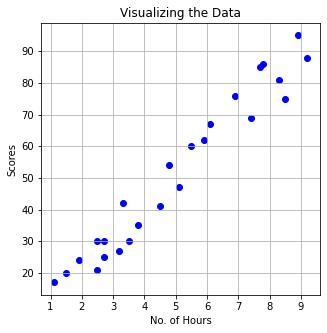

In [269]:
plt.figure(figsize=(5,5))
plt.scatter(df['Hours'], df['Scores'], color="blue")
plt.title("Visualizing the Data")
plt.xlabel("No. of Hours")
plt.ylabel("Scores")
plt.grid()

##### As there exists linear relationship between Scores and No. of Hours, We can use simple linear regression on our dataset

<h2 style="color:#10124d">Preparing the Data</h2>

In [270]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values
print(X)
print(y)


[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


<h2 style="color:#10124d">Simple Linear Regression</h2>

<h3 style="color:#10124d">Train Test Split</h3>

The train-test split is a technique for evaluating the performance of a machine learning algorithm.

In [271]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

We have trained our dataset and now it's time to train our model

<h3 style="color:#10124d">Training</h3>

In [272]:
from sklearn.linear_model import LinearRegression

Make an instance of the model 

In [273]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

<h3 style="color:#10124d">Equation of line of Regression</h3>

In [316]:
a = reg.intercept_
b = reg.coef_
print("Equation of line => y = {:.2f} + {:.2f}x".format(a, b[0]) )

Equation of line => y = 2.02 + 9.91x


Text(0, 0.5, 'Scores')

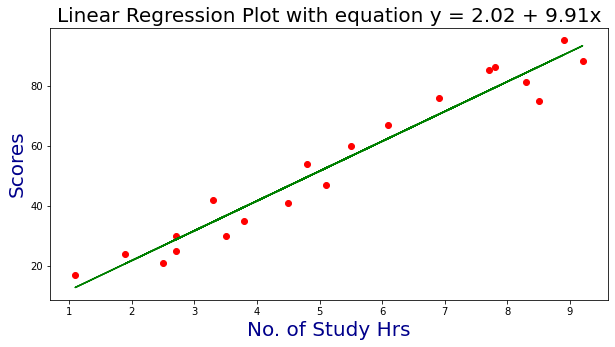

In [332]:
plt.figure(figsize=(10,5))
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, reg.predict(X_train), color="green")
plt.title("Linear Regression Plot with equation y = 2.02 + 9.91x", fontsize=20)
plt.xlabel('No. of Study Hrs', fontsize=20,color='darkblue')
plt.ylabel('Scores', fontsize=20,color='darkblue')

<h2 style="color:#10124d">Predicting the Test Results</h2>

Now that we have trained our algorithm, it's time to make some predictions.

In [275]:
#Predicting the scores
y_pred = reg.predict(X_test)

<h2 style="color:#10124d">Measuring the Model Performance</h2>

Comparing actual vs Predicted score 

In [284]:
data = {'Actual' : y_pred, "Predicted" : y_test}
df = pd.DataFrame(data)  
df 

,Actual,Predicted
0,16.884145,20
1,33.732261,27
2,75.357018,69
3,26.794801,30
4,60.491033,62


In [287]:
reg.score(X_test, y_test)

0.9454906892105355

#### Accuracy - 94.5%

We can also test with our own data

### Now let's Predict, What will be the Score if student studies 9.25hrs/day?

In [337]:
hours = 9.25
reg.predict(np.array(hours).reshape(-1,1))

array([93.69173249])

<h2 style="color:#10124d">Evaluating the Model </h2>

In [312]:
from sklearn import metrics

In [345]:
print('Mean Absolute Error : ',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error :  4.183859899002975


In [314]:
print('Mean Squared Errror : ',metrics.mean_squared_error(y_test, y_pred))

Mean Squared Errror :  21.598769307217406


<h2>Conclusion -> Predicted score if a student studies for 9.25 hrs/ day == 93.69173249<h2>